In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")

In [18]:
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [5]:
X = data.drop('class', axis=1)
y = data['class']

In [7]:
parameters = {
    'n_estimators' : range(10,51,10),
    'max_depth' : range(1,13,2),
    'min_samples_leaf' : range(1,8),
    'min_samples_split' : range(2,10,2)
}

In [8]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv=3, n_jobs=-1)

In [9]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [11]:
data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [13]:
y_pred = clf.best_estimator_.predict(data_test)

In [15]:
type(y_pred)

numpy.ndarray

In [16]:
len(y_pred)

1500

In [17]:
np.unique(y_pred, return_counts=True)

(array(['cruiser', 'fighter', 'transport'], dtype=object),
 array([230, 675, 595], dtype=int64))

In [19]:
clf.best_estimator_.feature_importances_

array([0.08272264, 0.12437216, 0.17144063, 0.36380346, 0.        ,
       0.25766112])

In [20]:
np.argmax(clf.best_estimator_.feature_importances_)

3

In [25]:
X.columns[np.argmax(clf.best_estimator_.feature_importances_)]

'brightness'

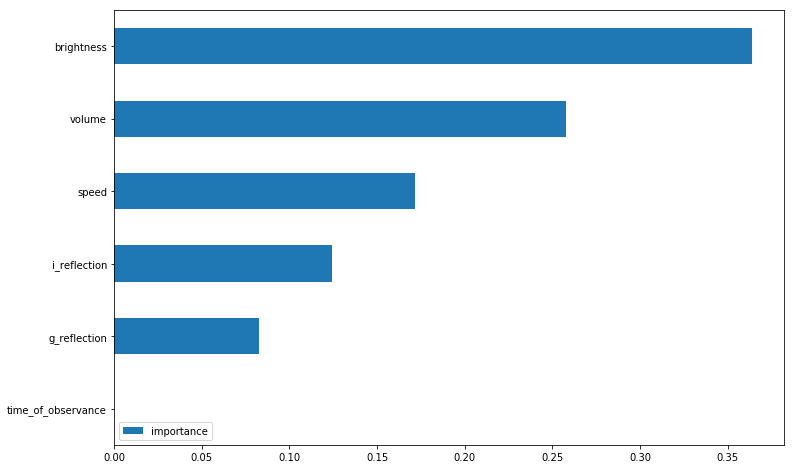

In [24]:
imp = pd.DataFrame(clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [26]:
data_more = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [27]:
data_more.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [33]:
X = data_more.drop('dangerous', axis=1)
y = data_more.dangerous

In [37]:
parameters = {
    'n_estimators' : range(10,52,20),
    'max_depth' : range(1,12,5),
    'min_samples_leaf' : range(1,10,4),
    'min_samples_split' : range(2,13,5)
}

In [38]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv=3, n_jobs=-1)

In [39]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [40]:
clf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 10}

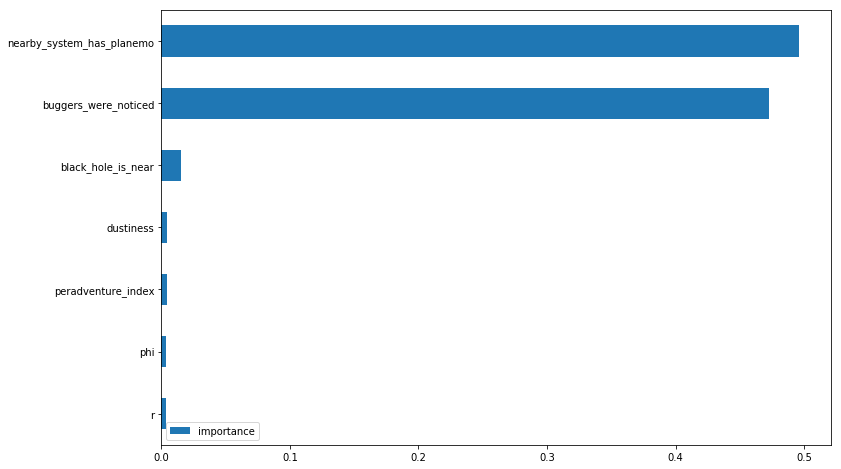

In [41]:
imp = pd.DataFrame(clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));